# Zadanie

Do tarczy oddano $50$ strzałów. Mierząc odległości trafień od środka tarczy. Okazało się, że wariancja tych odległości jest równa $S^2=107.3$ $cm^2$. Zakładając, że te odległości mają rozkład normalny na poziomie istotności $\alpha = 0.05$, zweryfikować hipotezę $H$, że wariancja odległości trafienia od środka tarczy jest równa $\sigma^2=100$ $cm^2$ przy hipotezie alternatywnej:

<ul>
<li> $\sigma^2 \neq 100$ </li>
<li> $\sigma^2 < 100$ </li>
<li> $\sigma^2 > 100$ </li>
</ul>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy \red{obu parametrach nieznanych} ($n\geq50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

vs

$$
H_{1}: \sigma = \sigma_1 > \sigma_0
$$


W tym teście używa się statystyki

$$
U=\sqrt{\frac{2nS^2}{\sigma_{0}^2}} - \sqrt{2n-3}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
[u(1-\alpha), +\infty)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy \red{obu parametrach nieznanych} ($n\geq50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

vs

$$
H_{1}: \sigma = \sigma_1 < \sigma_0
$$


W tym teście używa się statystyki

$$
U=\sqrt{\frac{2nS^2}{\sigma_{0}^2}} - \sqrt{2n-3}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(-\infty, -u(1-\alpha)]
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.


## Model 3.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy \red{obu parametrach nieznanych} ($n\geq50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

vs

$$
H_{1}: \sigma = \sigma_1 \neq \sigma_0
$$


W tym teście używa się statystyki

$$
U=\sqrt{\frac{2nS^2}{\sigma_{0}^2}} - \sqrt{2n-3}
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(-\infty, -u(1-\frac{1}{2}\alpha)] \cup [u(1-\frac{1}{2}\alpha) , +\infty)
$$

gdzie $u(\alpha)$ jest kwantylem rozkładu normalnego.

## Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [2]:
alpha = 0.05
s_kw = 107.3
sigma=np.sqrt(s_kw)
print('sigma =',sigma)
mi = 0 # co wstawić za mi????????????? zero jest źle
# X = stats.norm(mi, sigma)
X = stats.norm()
print(X)

sigma = 10.358571330062848


## Wyliczmy wartość statystyki

$$
U=\sqrt{\frac{2nS^2}{\sigma_{0}^2}} - \sqrt{2n-3}
$$

In [3]:
n=50
s_kw = 107.3
sigma0_kw = 100
u = np.sqrt((2*n*s_kw)/sigma0_kw) - np.sqrt(2*n-3)
u

0.5097135282667438

# $H_0$: $\sigma^2=100$ przy hipotezie alternatywnej $H_1$: $\sigma^2\neq 100$

## Wypisz przedział krytyczny


In [4]:
# (−∞,−u(1−0.5α)]∪[u(1−0.5α),+∞)
L1 = -np.inf
# L2 = X.ppf(alpha/2)
# R1 = X.ppf(1-alpha/2)

L2 = X.isf(1-alpha/2)
R1 = X.ppf(1-alpha/2)

R2 = np.inf
print(L1, L2, R1, R2)

-inf -1.959963984540054 1.959963984540054 inf


In [5]:
print(r'( %3.3f , %3.3f) sum ( %3.3f , %3.3f)' % (L1,L2,R1,R2))

( -inf , -1.960) sum ( 1.960 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [6]:
if (u <L2) | (u > R1):
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")
print('u =',u,'L2 =',L2,'R1 =',R1)

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0
u = 0.5097135282667438 L2 = -1.959963984540054 R1 = 1.959963984540054


## wylicz p-value

In [7]:
p = X.cdf(u) + X.sf(-u)
p

1.3897478261027754

## zweryfikuj hipotezę na podstawie wartości p-value

In [8]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")
print('p =',p, 'alpha = ',alpha)

Nie ma podstaw by odrzucić hipotezę zerową H_0
p = 1.3897478261027754 alpha =  0.05


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

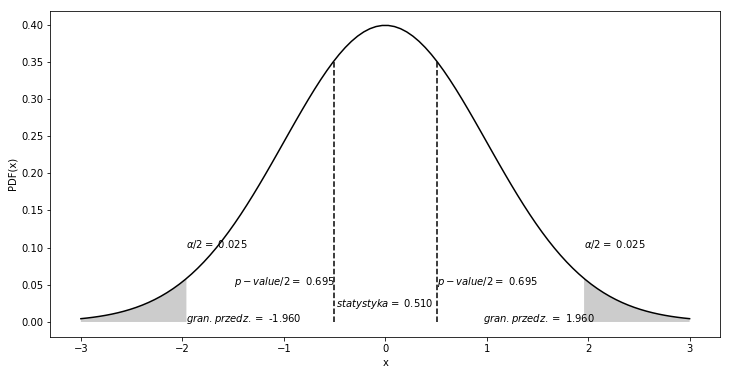

In [9]:
u_1 = X.isf(alpha/2)   # IFS(x) = SF(x)^(-1) = (1 - CDF(x))^(-1)
u_2 = X.ppf(alpha/2)   # PPF(x) = CDF(x)^(-1)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)

x2 = np.linspace(-3, u_2)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.fill_between(x2, y2, facecolor='#CCCCCC')

axs.text(u_1, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))
axs.text(u_2, 0.1, r'$\alpha/2 = $ %.3f' % np.round(alpha/2,3))

axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.vlines(-u, 0, X.pdf(-u), linestyles='--')

axs.text(u-1.0, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(L2, 0, r'$gran.  przedz. = $ %.3f' % np.round(L2,3))
axs.text(R1-1.0, 0, r'$gran.  przedz. = $ %.3f' % np.round(R1,3))

axs.text(u-2.0, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))
axs.text(u, 0.05, r'$p-value/2 = $ %.3f' % np.round(p/2,3))

axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\sigma^2=100$ przy hipotezie alternatywnej $H_1$: $\sigma^2>100$
## Wypisz przedział krytyczny

In [10]:
# [u(1−α),+∞)
L = X.ppf(1-alpha)
P = np.inf
print('(L, P) =',(L,P))

(L, P) = (1.6448536269514722, inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [11]:
# sprawdzenie czy wartość statystyki U wpada w prawy ogon
if u > L:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")
print('u =',u,'L =',L)

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0
u = 0.5097135282667438 L = 1.6448536269514722


## wylicz p-value

In [12]:
p=1-X.cdf(u)
p

0.3051260869486123

## zweryfikuj hipotezę na podstawie wartości p-value

In [13]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

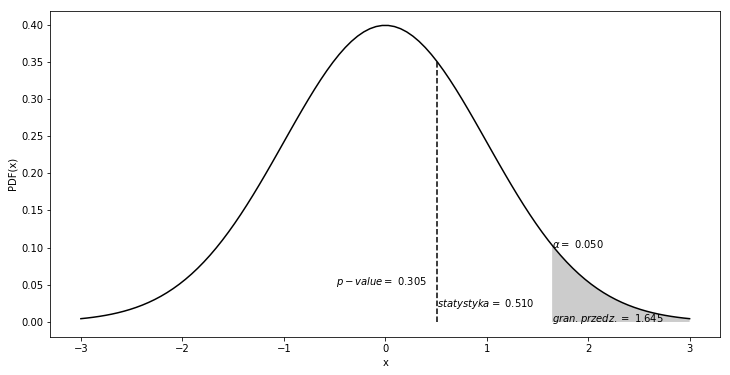

In [14]:
u_1=X.ppf(1-alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(u_1, 3)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
#axs.text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(L, 0, r'$gran.  przedz. = $ %.3f' % np.round(L,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()

# $H_0$: $\sigma^2=100$ przy hipotezie alternatywnej $H_1$: $\sigma^2<100$

## Wypisz przedział krytyczny

In [20]:
# (−∞,−u(1−α)]
L = -np.inf
R = X.isf(1-alpha)
print('(L,P) =',(L,R))

(L,P) = (-inf, -1.6448536269514722)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [21]:
# sprawdzenie czy wartość statystyki U wpada w lewy ogon
if u < R:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")
print('u =',u,'R =',R)

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0
u = 0.5097135282667438 R = -1.6448536269514722


## wylicz p-value

In [22]:
p=X.cdf(u)
p

0.6948739130513877

## zweryfikuj hipotezę na podstawie wartości p-value

In [23]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

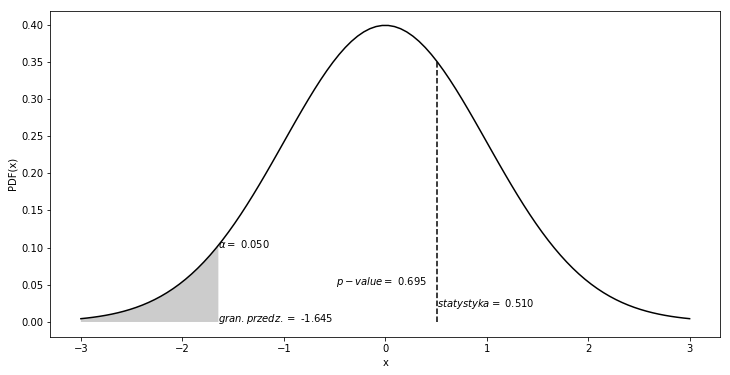

In [24]:
u_1=X.ppf(alpha)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)
figs, axs = plt.subplots(1,1, figsize=(12, 6))
axs.plot(x,yp, 'k')
axs.fill_between(x1, y1, facecolor='#CCCCCC')
axs.text(u_1, 0.1, r'$\alpha = $ %.3f' % np.round(alpha,3))
axs.vlines(u, 0, X.pdf(u), linestyles='--')
axs.text(u, 0.02, r'$statystyka = $ %.3f' % np.round(u,3))
axs.text(R, 0, r'$gran.  przedz. = $ %.3f' % np.round(R,3))
axs.text(u-1.0, 0.05, r'$p-value = $ %.3f' % np.round(p,3))
axs.set_xlabel('x')
axs.set_ylabel('PDF(x)')
plt.show()